# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import requests

# Loading in Data

In [40]:
positions = ['QB','WR','TE']
dst = 'DST'
kickers = 'K'

weeks = []
for i in np.arange(1,19):
    weeks.append(str(i))

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

data = pd.DataFrame()
for position in positions:
    position_df = pd.DataFrame()
    for week in weeks:
        week_df = pd.DataFrame()
        url = f'https://www.footballdb.com/fantasy-football/index.html?pos={position}&yr=2023&wk={week}&key=48ca46aa7d721af4d58dccc0c249a1c4'
        response = requests.get(url, headers=headers)

        dfs = pd.read_html(response.text)
        week_df = dfs[0]
        week_df['Week'] = week
        
        position_df = pd.concat([position_df, week_df], axis=0)
        
    position_df['Position'] = position
    data = pd.concat([data,position_df], axis=0)    

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Passing  \
                         Player               Game               Pts*     Att   
0   Tua TagovailoaT. Tagovailoa            MIA@LAC               33.0      45   
1             Mac JonesM. Jones             PHI@NE               29.0      54   
2            Jordan LoveJ. Love             GB@CHI               28.0      27   
3     Patrick MahomesP. Mahomes             DET@KC               23.0      39   
4      Justin HerbertJ. Herbert            MIA@LAC               22.0      33   
..                          ...                ...                ...     ...   
53         Drew SampleD. Sample            CLE@CIN                0.0       0   
54       Eric SaubertE. Saubert            HOU@IND                0.0       0   
55          Ian ThomasI. Thomas             TB@CAR                0.0       0   
56        Logan ThomasL. Thomas            DAL@WAS                0.0       0   
57       Nick VannettN. Vannett             KC@LAC                0.0       0   

                       Rushing  ...        Receiving            Fumbles     \
   Cmp  Yds TD Int 2Pt     Att  ... TD 2Pt       Rec Yds TD 2Pt      FL TD   
0   28  466  3   1   0       5  ...  0   0         0   0  0   0       1  0   
1   35  316  3   1   0       2  ...  0   0         0   0  0   0       0  0   
2   15  245  3   0   0       3  ...  0   0         0   0  0   0       0  0   
3   21  226  2   1   0       6  ...  0   0         0   0  0   0       0  0   
4   23  229  1   0   0       5  ...  1   0         0   0  0   0       0  0   
..  ..  ... ..  ..  ..     ...  ... ..  ..       ...  .. ..  ..     ... ..   
53   0    0  0   0   0       0  ...  0   0         2   7  0   0       0  0   
54   0    0  0   0   0       0  ...  0   0         1   5  0   0       0  0   
55   0    0  0   0   0       0  ...  0   0         1   5  0   0       0  0   
56   0    0  0   0   0       0  ...  0   0         1   9  0   0       0  0   
57   0    0  0   0   0       0  ...  0   0         1   3  0   0       0  0   

   Week Position  
                  
0     1       QB  
1     1       QB  
2     1       QB  
3     1       QB  
4     1       QB  
..  ...      ...  
53   18       TE  
54   18       TE  
55   18       TE  
56   18       TE  
57   18       TE  

[3655 rows x 21 columns]

In [42]:
kicker_data = pd.DataFrame()
for week in weeks:
    week_df = pd.DataFrame()
    url = f'https://www.footballdb.com/fantasy-football/index.html?pos=K&yr=2023&wk={week}&key=48ca46aa7d721af4d58dccc0c249a1c4'
    response = requests.get(url, headers=headers)

    dfs = pd.read_html(response.text)
    week_df = dfs[0]
    week_df['Week'] = week
      
    kicker_data = pd.concat([kicker_data, week_df], axis=0)
    
kicker_data['Position'] = 'K'
kicker_data

,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position
0,Jake ElliottJ. Elliott,PHI@NE,17.0,2,1,4,4,2,1,K
1,Nick FolkN. Folk,TEN@NO,17.0,0,0,5,5,1,1,K
2,Brett MaherB. Maher,LA@SEA,14.0,3,3,5,3,1,1,K
3,Tyler BassT. Bass,BUF@NYJ,12.0,1,1,3,3,1,1,K
4,Cameron DickerC. Dicker,MIA@LAC,12.0,4,4,2,2,1,1,K
...,...,...,...,...,...,...,...,...,...,...
27,Jake MoodyJ. Moody,LA@SF,2.0,3,2,1,0,0,18,K
28,Riley PattersonR. Patterson,CLE@CIN,2.0,2,2,0,0,0,18,K
29,Jason SandersJ. Sanders,BUF@MIA,2.0,2,2,0,0,0,18,K
30,Brett MaherB. Maher,LA@SF,1.0,2,1,0,0,0,18,K


In [44]:
dst_data = pd.DataFrame()
for week in weeks:
    week_df = pd.DataFrame()
    url = f'https://www.footballdb.com/fantasy-football/index.html?pos=DST&yr=2023&wk={week}&key=48ca46aa7d721af4d58dccc0c249a1c4'
    response = requests.get(url, headers=headers)

    dfs = pd.read_html(response.text)
    week_df = dfs[0]
    week_df['Week'] = week
      
    dst_data = pd.concat([dst_data, week_df], axis=0)
    
dst_data['Position'] = 'DST'
dst_data

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position
0,Dallas CowboysDAL,DAL@NYG,37.0,7.0,2,0,1,1,2,0,63,108,171,1,DST
1,New York JetsNYJ,BUF@NYJ,23.0,5.0,3,0,1,0,1,16,217,97,314,1,DST
2,Arizona CardinalsARI,ARI@WAS,22.0,6.0,1,0,2,0,1,20,156,92,248,1,DST
3,Green Bay PackersGB,GB@CHI,18.0,4.0,1,0,1,0,1,20,189,122,311,1,DST
4,Philadelphia EaglesPHI,PHI@NE,16.0,2.0,1,0,1,0,1,20,306,76,382,1,DST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Denver BroncosDEN,DEN@LV,4.0,3.0,0,0,0,0,0,27,230,129,359,18,DST
28,Washington CommandersWAS,DAL@WAS,4.0,0.0,1,0,0,1,0,38,309,131,440,18,DST
29,Atlanta FalconsATL,ATL@NO,3.0,3.0,0,0,0,0,0,48,246,154,400,18,DST
30,Arizona CardinalsARI,SEA@ARI,1.0,0.0,0,0,0,0,0,21,189,138,327,18,DST


# Cleaning Data

In [77]:
# Renaming columns in data dataframe
data2 = data.copy()
data2.columns = data2.columns.droplevel(0)
data2.columns = list(data2.columns[0:19]) + ['Week', 'Position']
data2['Player'] = data2['Player'].str.split('.').str[0]
data2['Player'] = data2['Player'].str[:-1]
data2

,Player,Game,Pts*,Att,Cmp,Yds,TD,Int,2Pt,Att,...,TD,2Pt,Rec,Yds,TD,2Pt,FL,TD,Week,Position
0,Tua Tagovailoa,MIA@LAC,33.0,45,28,466,3,1,0,5,...,0,0,0,0,0,0,1,0,1,QB
1,Mac Jones,PHI@NE,29.0,54,35,316,3,1,0,2,...,0,0,0,0,0,0,0,0,1,QB
2,Jordan Love,GB@CHI,28.0,27,15,245,3,0,0,3,...,0,0,0,0,0,0,0,0,1,QB
3,Patrick Mahomes,DET@KC,23.0,39,21,226,2,1,0,6,...,0,0,0,0,0,0,0,0,1,QB
4,Justin Herbert,MIA@LAC,22.0,33,23,229,1,0,0,5,...,1,0,0,0,0,0,0,0,1,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Drew Sample,CLE@CIN,0.0,0,0,0,0,0,0,0,...,0,0,2,7,0,0,0,0,18,TE
54,Eric Saubert,HOU@IND,0.0,0,0,0,0,0,0,0,...,0,0,1,5,0,0,0,0,18,TE
55,Ian Thomas,TB@CAR,0.0,0,0,0,0,0,0,0,...,0,0,1,5,0,0,0,0,18,TE
56,Logan Thomas,DAL@WAS,0.0,0,0,0,0,0,0,0,...,0,0,1,9,0,0,0,0,18,TE


In [79]:
kicker_data['Player'] = kicker_data['Player'].str.split('.').str[0]
kicker_data['Player'] = kicker_data['Player'].str[:-1]
kicker_data

,Player,Game,Pts*,XPA,XPM,FGA,FGM,50+,Week,Position
0,Jake Elliott,PHI@NE,17.0,2,1,4,4,2,1,K
1,Nick Folk,TEN@NO,17.0,0,0,5,5,1,1,K
2,Brett Maher,LA@SEA,14.0,3,3,5,3,1,1,K
3,Tyler Bass,BUF@NYJ,12.0,1,1,3,3,1,1,K
4,Cameron Dicker,MIA@LAC,12.0,4,4,2,2,1,1,K
...,...,...,...,...,...,...,...,...,...,...
27,Jake Moody,LA@SF,2.0,3,2,1,0,0,18,K
28,Riley Patterson,CLE@CIN,2.0,2,2,0,0,0,18,K
29,Jason Sanders,BUF@MIA,2.0,2,2,0,0,0,18,K
30,Brett Maher,LA@SF,1.0,2,1,0,0,0,18,K


In [91]:
dst_data2 = dst_data.copy()
dst_data2['Team'] = dst_data2['Team'].str[-3:]
dst_data2['Team'] = dst_data2['Team'].str.replace('s', '')

dst_data2['Team'].value_counts()

Team
DAL    17
NYJ    17
CHI    17
SEA    17
MIA    17
LAC    17
KC     17
MIN    17
CAR    17
PIT    17
BUF    17
LV     17
NE     17
DEN    17
CIN    17
HOU    17
LA     17
WAS    17
JAX    17
CLE    17
TEN    17
IND    17
DET    17
TB     17
NO     17
BAL    17
ATL    17
SF     17
PHI    17
GB     17
ARI    17
NYG    17
Name: count, dtype: int64

In [92]:
dst_data2

,Team,Game,Pts*,Sack,Int,Saf,FR,Blk,TD,PA,PassYds,RushYds,TotYds,Week,Position
0,DAL,DAL@NYG,37.0,7.0,2,0,1,1,2,0,63,108,171,1,DST
1,NYJ,BUF@NYJ,23.0,5.0,3,0,1,0,1,16,217,97,314,1,DST
2,ARI,ARI@WAS,22.0,6.0,1,0,2,0,1,20,156,92,248,1,DST
3,GB,GB@CHI,18.0,4.0,1,0,1,0,1,20,189,122,311,1,DST
4,PHI,PHI@NE,16.0,2.0,1,0,1,0,1,20,306,76,382,1,DST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,DEN,DEN@LV,4.0,3.0,0,0,0,0,0,27,230,129,359,18,DST
28,WAS,DAL@WAS,4.0,0.0,1,0,0,1,0,38,309,131,440,18,DST
29,ATL,ATL@NO,3.0,3.0,0,0,0,0,0,48,246,154,400,18,DST
30,ARI,SEA@ARI,1.0,0.0,0,0,0,0,0,21,189,138,327,18,DST


# Visualization

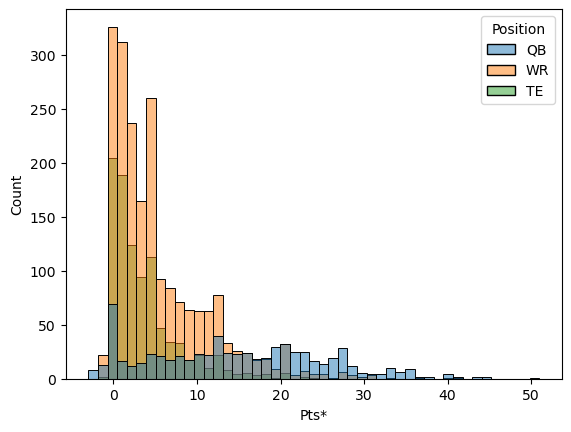

In [95]:
sns.histplot(data2,x='Pts*',hue='Position');

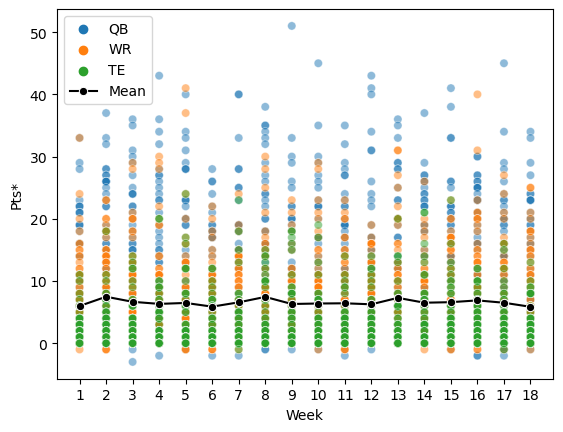

In [99]:
sns.scatterplot(data2,x='Week',y='Pts*',hue='Position',alpha=.5);
mean_pts_per_week = data2.groupby('Week')['Pts*'].mean().reset_index()

sns.lineplot(data=mean_pts_per_week, x='Week', y='Pts*', color='black', marker='o', label='Mean');